**Z-score Method**

**The Z-score method, standardizes the data and identifies outliers based on how many standard deviations a data point is away from the mean. It is more sensitive to extreme values and outliers that deviate significantly from the mean.**

In [184]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

**Just For Practice and Understanding**

In [185]:
dataset=pd.read_csv(r"weight-height.csv")

In [186]:
dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


**The describe() method in pandas provides descriptive statistics for numerical columns in a DataFrame. It generates a summary of the central tendency, dispersion, and shape of the dataset's distribution.**

In [187]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


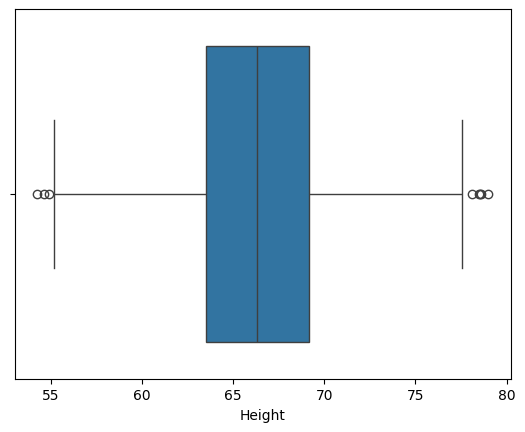

In [188]:
sns.boxplot(x="Height",data=dataset)
plt.show()

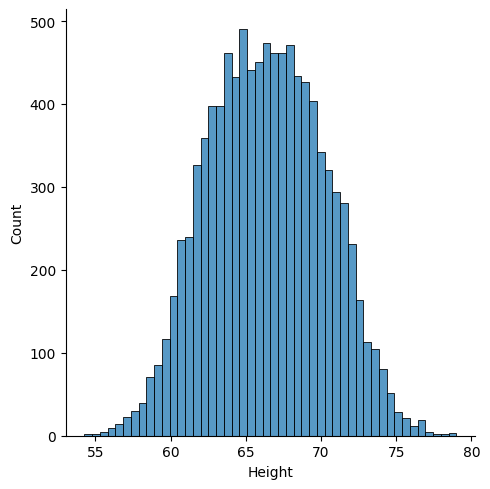

In [189]:
sns.displot(dataset["Height"])
plt.show()

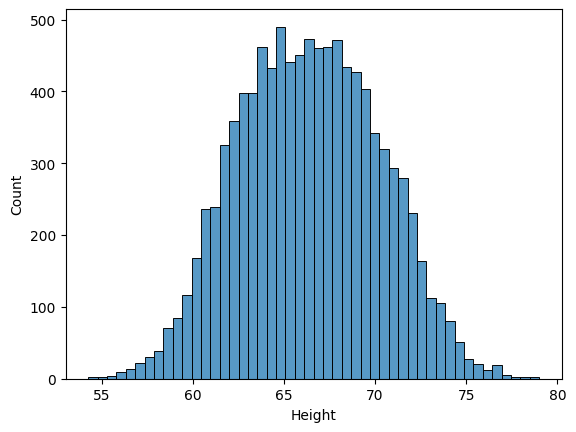

In [190]:
sns.histplot(dataset["Height"])
plt.show()

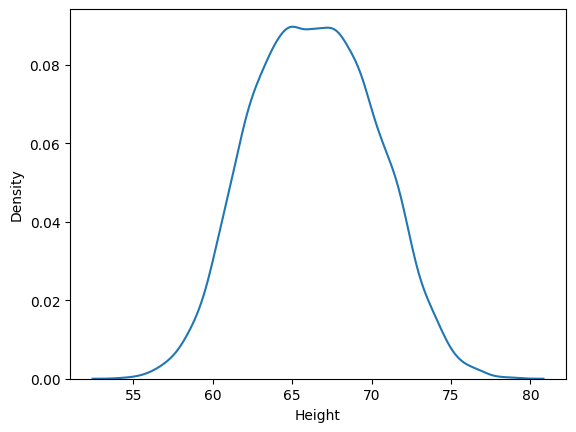

In [191]:
sns.kdeplot(dataset["Height"])
plt.show()

**Work on dataset**

In [192]:
data=pd.read_csv(r"loan_data_set.csv")

In [193]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**The describe() method in pandas provides descriptive statistics for numerical columns in a DataFrame. It generates a summary of the central tendency, dispersion, and shape of the dataset's distribution.**

In [194]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Check the column with kdeplot graph it is clearly visible outliers are present.**

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

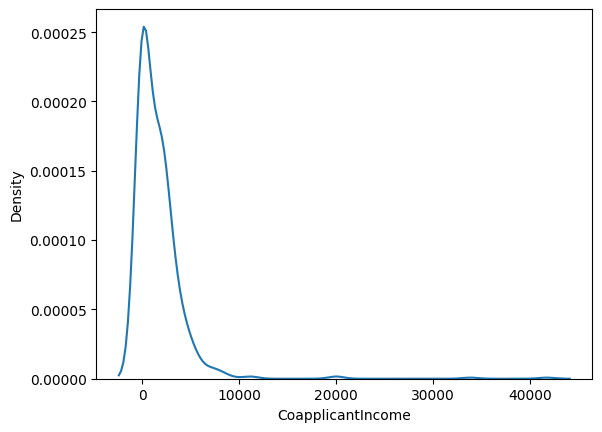

In [195]:
sns.kdeplot(data["CoapplicantIncome"])

**Check the column with boxplot graph it is clearly visible outliers are present.**

<Axes: ylabel='CoapplicantIncome'>

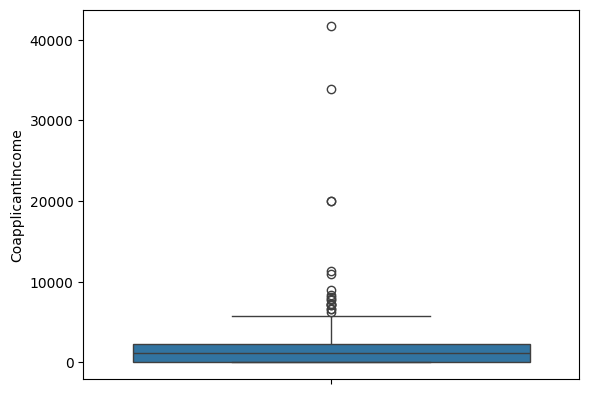

In [196]:
sns.boxplot(data["CoapplicantIncome"])


<Axes: ylabel='ApplicantIncome'>

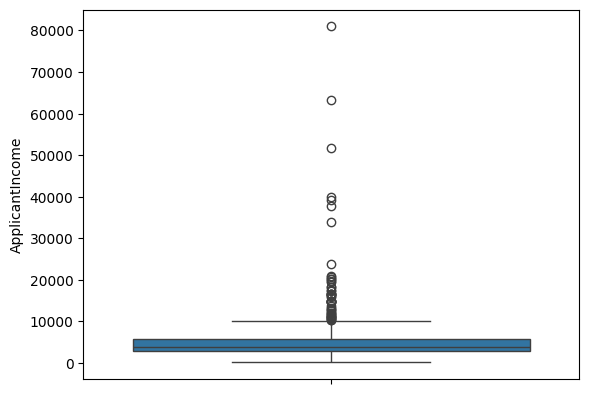

In [197]:
sns.boxplot(data["ApplicantIncome"])

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

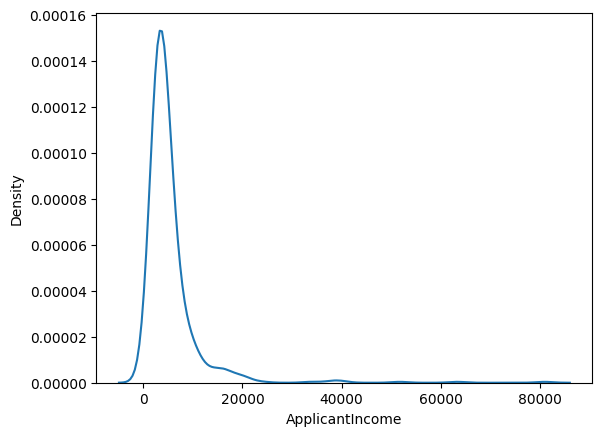

In [198]:
sns.kdeplot(data["ApplicantIncome"])

**Directly method (Z_score)**

In [199]:
min_range_coapp=data["CoapplicantIncome"].mean()-(3*data["CoapplicantIncome"].std())
max_range_coapp=data["CoapplicantIncome"].mean()+(3*data["CoapplicantIncome"].std())

In [200]:
min_range_coapp,max_range_coapp

(-7157.4993096454655, 10399.990905699668)

In [201]:
outlier_remove_data=data[data["CoapplicantIncome"]<=max_range_coapp]

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

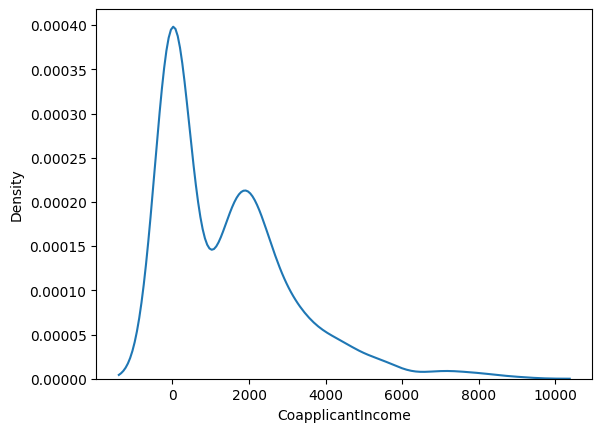

In [202]:
sns.kdeplot(x="CoapplicantIncome",data=outlier_remove_data)

In [203]:
min_range_incapp=data["ApplicantIncome"].mean()-(3*data["ApplicantIncome"].std())
max_range_incapp=data["ApplicantIncome"].mean()+(3*data["ApplicantIncome"].std())

In [204]:
min_range_incapp,max_range_incapp

(-12923.66573677391, 23730.584303549156)

In [205]:
outlier_remove_data1=data[data["ApplicantIncome"]<=max_range_incapp]

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

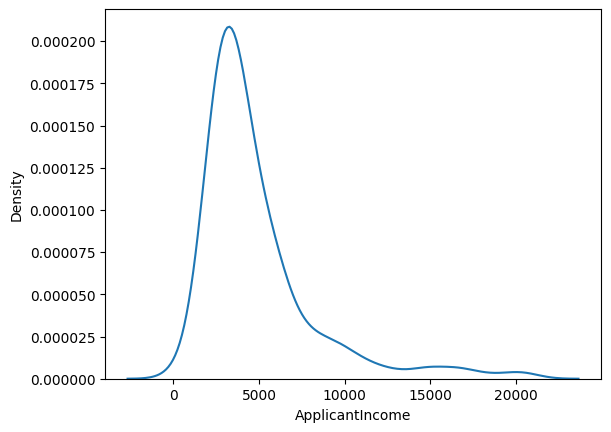

In [206]:
sns.kdeplot(x="ApplicantIncome",data=outlier_remove_data1)

In [207]:
data=outlier_remove_data1

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

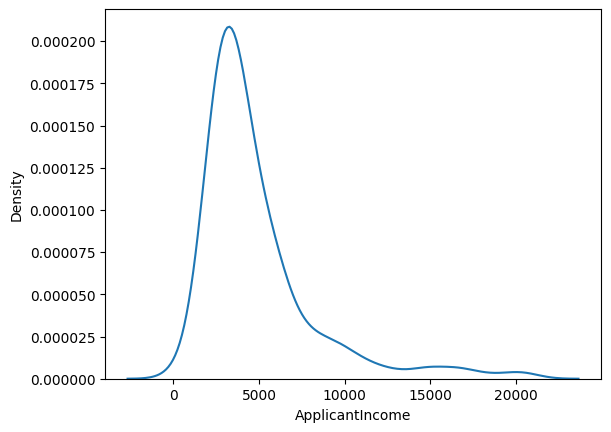

In [208]:
sns.kdeplot(data["ApplicantIncome"])

In [209]:
data["ApplicantIncome"].shape

(606,)

**Changes in orignal dataset**

In [210]:
data=outlier_remove_data

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

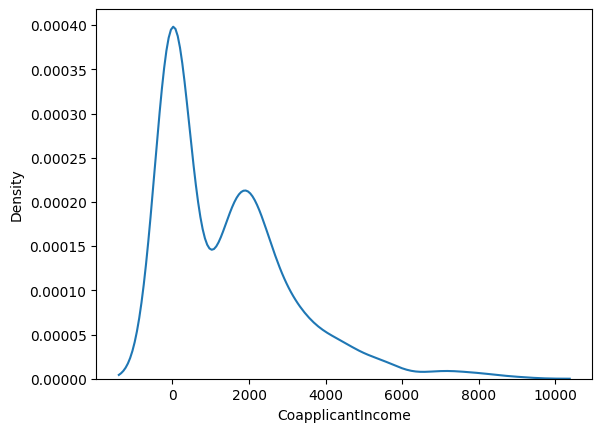

In [211]:
sns.kdeplot(data["CoapplicantIncome"])

In [212]:
data["CoapplicantIncome"].shape

(608,)

In [213]:
data2=pd.read_csv(r"loan_data_set.csv")

In [214]:
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


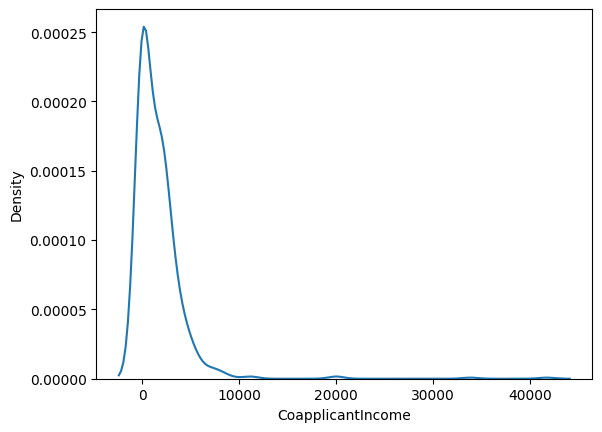

In [215]:
sns.kdeplot(data2["CoapplicantIncome"])
plt.show()

**Z_score method**

In [216]:
data2["Coapplicant_Zscore"]=(data2["CoapplicantIncome"]-data2["CoapplicantIncome"].mean())/(data2["CoapplicantIncome"].std())

In [227]:
filtered_data = data2[data2["Coapplicant_Zscore"] < 3]

**Changes in orignal dataset**

In [228]:
data2=filtered_data

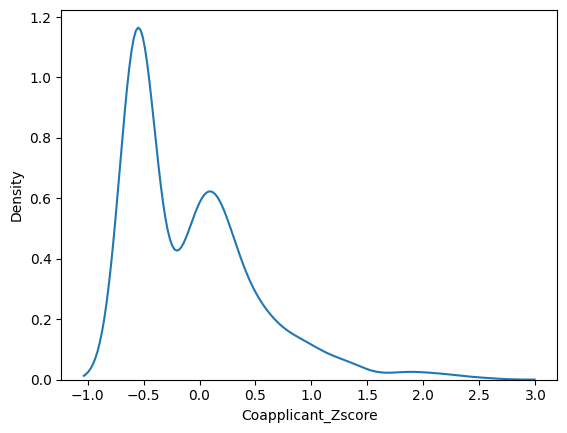

In [230]:
sns.kdeplot(data2["Coapplicant_Zscore"])
plt.show()

In [231]:
data2["Coapplicant_Zscore"].shape


(608,)